In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_path = 'parkinsons_updrs.csv'
x = pd.read_csv(data_path)
x.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [7]:
# Find the user with the most entries in the dataset
user_entry_counts = x['subject#'].value_counts()
most_entries_user = user_entry_counts.idxmax()
most_entries_count = user_entry_counts.max()

most_entries_user, most_entries_count

(29, 168)

In [8]:
x[x['subject#']==29]

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
3871,29,78,0,8.3951,27.549,34.368,0.00457,0.000029,0.00150,0.00215,...,0.299,0.01427,0.01906,0.02978,0.04280,0.025502,22.925,0.53348,0.59601,0.25751
3872,29,78,0,15.3900,27.173,33.842,0.00406,0.000026,0.00201,0.00225,...,0.371,0.01828,0.02144,0.04478,0.05484,0.023421,22.270,0.53955,0.63208,0.17570
3873,29,78,0,22.3830,26.797,33.315,0.00413,0.000024,0.00180,0.00207,...,0.362,0.01419,0.01714,0.03031,0.04256,0.033285,25.404,0.55501,0.60424,0.22569
3874,29,78,0,29.3810,26.420,32.789,0.00351,0.000021,0.00168,0.00183,...,0.515,0.02957,0.03444,0.04903,0.08870,0.012865,20.961,0.57556,0.61860,0.18838
3875,29,78,0,36.3870,26.044,32.261,0.00397,0.000025,0.00100,0.00154,...,0.319,0.01170,0.01775,0.03692,0.03510,0.018082,23.423,0.45617,0.61821,0.16820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,29,78,0,184.4000,24.439,33.038,0.00258,0.000016,0.00074,0.00101,...,0.237,0.00823,0.01165,0.02454,0.02468,0.017211,27.237,0.46367,0.60017,0.20094
4035,29,78,0,191.4000,24.550,33.423,0.00470,0.000029,0.00199,0.00292,...,0.406,0.01677,0.02538,0.04846,0.05031,0.021119,22.494,0.46632,0.65654,0.22018
4036,29,78,0,198.3600,24.659,33.807,0.00453,0.000025,0.00152,0.00197,...,0.396,0.01968,0.02229,0.03129,0.05904,0.022460,23.282,0.39934,0.61805,0.19565
4037,29,78,0,204.4000,24.754,34.140,0.00392,0.000024,0.00140,0.00218,...,0.309,0.01100,0.01730,0.03368,0.03299,0.011577,24.661,0.52658,0.64175,0.20314


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,153.073297,-3.368527,1.652616,-0.582936,25.437975,33.578976,9.425051e-03,3.345922e-05,4.650966e-03,6.300671e-03,...,0.406986,1.849816e-02,2.850592e-02,4.286068e-02,5.549399e-02,0.124622,-10.985977,0.184041,8.549753e-02,0.178364
age,-3.368527,77.819281,-0.170891,9.374668,19.625225,29.289136,1.144660e-03,1.132943e-05,2.825951e-04,4.344946e-04,...,0.225725,1.155014e-02,1.322760e-02,2.384357e-02,3.465075e-02,0.003735,-3.968692,0.080362,-5.808691e-02,0.097496
sex,1.652616,-0.170891,0.216835,-0.244019,-0.118125,-0.481119,1.346709e-04,-2.591216e-06,1.115962e-04,1.529008e-04,...,0.006056,2.769903e-04,5.029756e-04,2.174025e-04,8.309790e-04,0.004674,-0.000334,-0.007489,-5.451375e-03,-0.004256
test_time,-0.582936,9.374668,-0.244019,2856.432382,29.508743,43.041442,-6.864608e-03,-2.185626e-05,-4.822950e-03,-4.644804e-03,...,-0.381025,-2.053044e-02,-3.251135e-02,-4.177587e-02,-6.158536e-02,-0.084087,8.381207,-0.209883,7.298717e-02,-0.002755
motor_UPDRS,25.437975,19.625225,-0.118125,29.508743,66.085218,82.395498,3.877856e-03,1.489017e-05,1.845755e-03,2.314262e-03,...,0.206040,9.067132e-03,1.247710e-02,2.218736e-02,2.720137e-02,0.036378,-5.477711,0.105579,-6.700011e-02,0.120820
total_UPDRS,33.578976,29.289136,-0.481119,43.041442,82.395498,114.496062,4.468227e-03,2.576894e-05,2.139763e-03,2.529541e-03,...,0.243396,1.124101e-02,1.488295e-02,2.584200e-02,3.372328e-02,0.038931,-7.443747,0.169539,-8.609011e-02,0.152924
Jitter(%),0.009425,0.001145,0.000135,-0.006865,0.003878,0.004468,3.163194e-05,1.751743e-07,1.729114e-05,2.031993e-05,...,0.000928,4.944492e-05,6.504306e-05,7.261078e-05,1.483346e-04,0.000277,-0.016295,0.000243,9.034109e-05,0.000371
Jitter(Abs),0.000033,0.000011,-0.000003,-0.000022,0.000015,0.000026,1.751743e-07,1.294802e-09,9.494064e-08,1.061480e-07,...,0.000005,2.971401e-07,3.726070e-07,4.243084e-07,8.914179e-07,0.000002,-0.000109,0.000002,8.987280e-07,0.000003
Jitter:RAP,0.004651,0.000283,0.000112,-0.004823,0.001846,0.002140,1.729114e-05,9.494064e-08,9.758245e-06,1.104113e-05,...,0.000493,2.688708e-05,3.434759e-05,3.765226e-05,8.066115e-05,0.000148,-0.008599,0.000121,4.759299e-05,0.000192
Jitter:PPQ5,0.006301,0.000434,0.000153,-0.004645,0.002314,0.002530,2.031993e-05,1.061480e-07,1.104113e-05,1.392436e-05,...,0.000631,3.342602e-05,4.564293e-05,4.984963e-05,1.002780e-04,0.000193,-0.010607,0.000144,4.639520e-05,0.000227


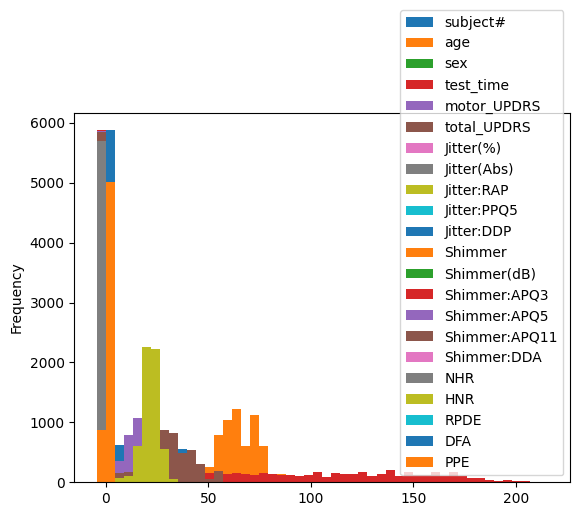

In [9]:
features = list(x.columns)
x.info()
x.describe().T
x.plot.hist(bins=50)
x.cov()


array([[<Axes: title={'center': 'subject#'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'test_time'}>,
        <Axes: title={'center': 'motor_UPDRS'}>],
       [<Axes: title={'center': 'total_UPDRS'}>,
        <Axes: title={'center': 'Jitter(%)'}>,
        <Axes: title={'center': 'Jitter(Abs)'}>,
        <Axes: title={'center': 'Jitter:RAP'}>,
        <Axes: title={'center': 'Jitter:PPQ5'}>],
       [<Axes: title={'center': 'Jitter:DDP'}>,
        <Axes: title={'center': 'Shimmer'}>,
        <Axes: title={'center': 'Shimmer(dB)'}>,
        <Axes: title={'center': 'Shimmer:APQ3'}>,
        <Axes: title={'center': 'Shimmer:APQ5'}>],
       [<Axes: title={'center': 'Shimmer:APQ11'}>,
        <Axes: title={'center': 'Shimmer:DDA'}>,
        <Axes: title={'center': 'NHR'}>, <Axes: title={'center': 'HNR'}>,
        <Axes: title={'center': 'RPDE'}>],
       [<Axes: title={'center': 'DFA'}>, <Axes: title={'center': 'PPE'}>,
      

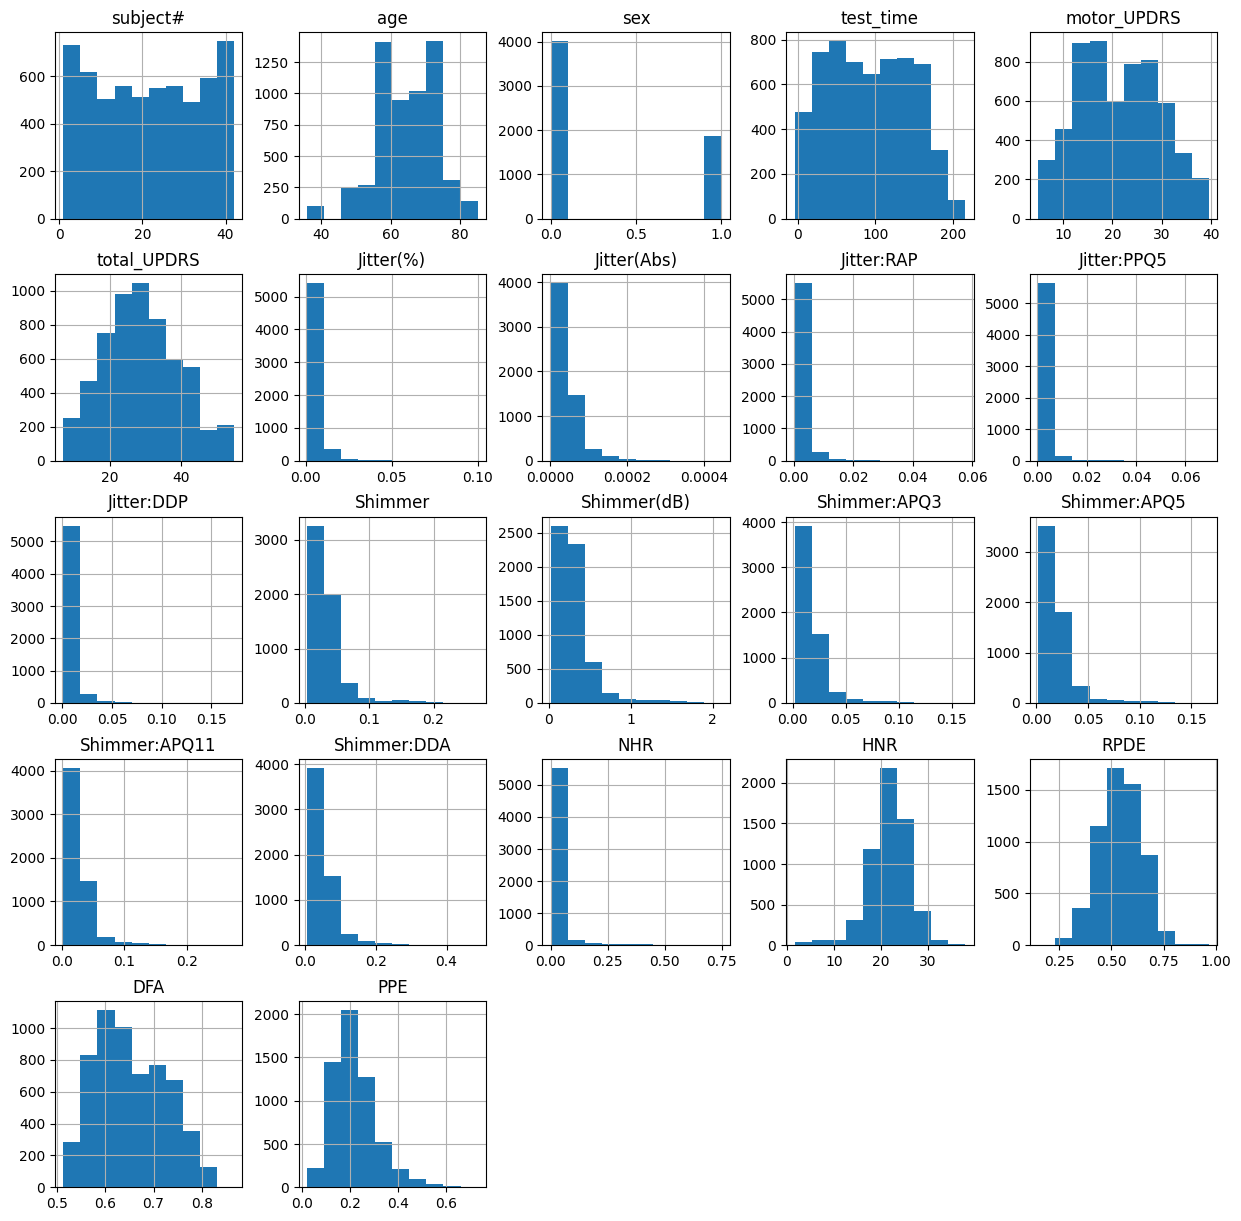

In [10]:
x.hist(figsize=(15, 15))

In [11]:
# data.plot.scatter(x='subject#', y='sex')
subj = pd.unique(x['subject#']) #list of unique subjects
print('The number of distinct patients in the dataset is', len(subj)) #number of unique subjects
x.shape

The number of distinct patients in the dataset is 42


(5875, 22)

In [12]:
#UPDRS measured once in a day, so we group by day and take the mean
X=pd.DataFrame()
for k in subj :
     xk=x [x['subject#']== k] # data of user k
     xk1=xk.copy()# we modify t h e values of xk ( next lines ) ;
 # a w arning would be i s s u e d i f we di d n ot make a copy
     xk1.test_time =xk1.test_time.astype(int) # Removed the decimal part
     xk1 ['g']= xk1['test_time'] # add a new feature - copy to nre feature called g
     v=xk1.groupby('g').mean() # group according to the new feature and calculate the mean
     # which is removed
     X=pd.concat([X, v] , axis=0, ignore_index=True) # append new data to X but as index - so there is no new col added
features = list(x.columns)
print( 'The dataset shape  after the mean is ' , X.shape)
print( 'The features of the dataset are' , len(features) )
print(features)
Np, Nc = X.shape # Np = number of rows / patients
# Nc=number Nf of regrssors ( features ) + 1 (regressand total UPDRS is included )

The dataset shape  after the mean is  (990, 22)
The features of the dataset are 22
['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']


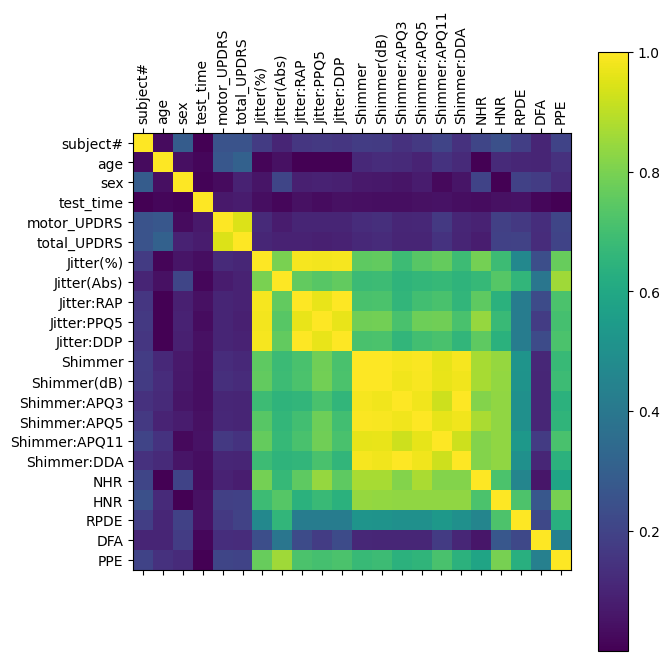

In [13]:
Xnorm = (X-X.mean())/X.std() # normalization which is done to make the data have a mean of 0 and a standard deviation of 1
Xcov = Xnorm.cov() # covariance matrix which shows the correlation between features
plt.figure(figsize=(7, 7))
plt.matshow(np.abs(Xcov.values), fignum=0)
plt.xticks(np.arange(len(features)), features, rotation=90)
plt.yticks(np.arange(len(features)), features, rotation=0)
plt.colorbar()
plt.tight_layout()
plt.show()

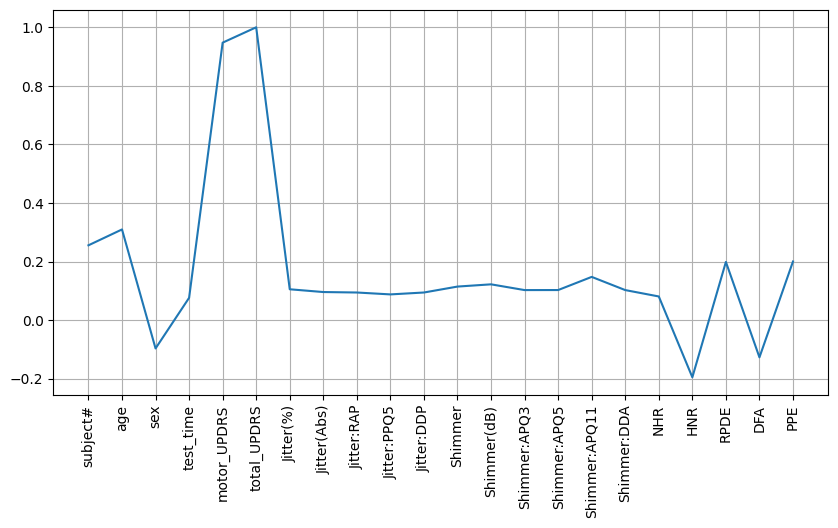

In [ ]:
plt.figure(figsize=(10, 5))
Xcov['total_UPDRS'].plot() # plot the correlation between the total UPDRS and the other features
plt.xticks(np.arange(len(features)), features, rotation=90) # set the x-axis labels to the features
plt.grid()
plt.show()

## Train/Test

In [ ]:
Np, Nc = X.shape

np.random.seed(308885)
indexsh = np.arange(Np)
np.random.shuffle(indexsh) # shuffle the indices of the patients
Xshuff = X.copy(deep=True) 
Xshuff.set_axis(indexsh, axis=0) #inplace=True removed 
Xshuff.sort_index(axis=0)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1.0,72.0,0.0,5.0,28.199000,34.398333,0.003640,0.000018,0.001692,0.001548,...,0.116000,0.005593,0.005885,0.009937,0.016778,0.012934,27.764833,0.405657,0.536482,0.151590
1,1.0,72.0,0.0,12.0,28.447000,34.894000,0.005093,0.000028,0.002130,0.002187,...,0.199167,0.008707,0.009687,0.013868,0.026123,0.025086,25.899667,0.443195,0.539320,0.190728
2,1.0,72.0,0.0,19.0,28.695000,35.389167,0.004407,0.000024,0.001767,0.001962,...,0.180667,0.007462,0.008985,0.014625,0.022388,0.024927,25.842500,0.464052,0.537425,0.208932
3,1.0,72.0,0.0,25.0,28.905000,35.810500,0.003428,0.000018,0.001380,0.001502,...,0.132833,0.005558,0.006307,0.009433,0.016665,0.015447,28.148167,0.422488,0.553013,0.173077
4,1.0,72.0,0.0,33.0,29.187333,36.375000,0.003755,0.000021,0.001495,0.001762,...,0.192000,0.008685,0.010132,0.015933,0.026047,0.014758,25.557833,0.460792,0.543742,0.217673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,42.0,61.0,0.0,142.0,22.485000,33.485000,0.004080,0.000034,0.001880,0.002072,...,0.223167,0.013077,0.015048,0.021350,0.039233,0.019768,23.326667,0.502812,0.591680,0.177443
986,42.0,61.0,0.0,149.0,21.988000,32.988000,0.005672,0.000047,0.002538,0.002510,...,0.297500,0.015437,0.017377,0.024252,0.046310,0.029447,21.831500,0.521350,0.607480,0.221597
987,42.0,61.0,0.0,156.0,21.495167,32.495167,0.004450,0.000036,0.002100,0.002345,...,0.219833,0.011852,0.013883,0.019713,0.035553,0.018783,23.728167,0.491877,0.608968,0.169078
988,42.0,61.0,0.0,163.0,21.007000,32.007000,0.004748,0.000038,0.002165,0.002290,...,0.252500,0.012885,0.014750,0.021117,0.038655,0.022209,23.025667,0.493693,0.614125,0.167328


In [129]:
N_train = int(Np * 0.5)
N_test = Np - N_train
N_train, N_test

(495, 495)

In [130]:
X_train = Xshuff[:N_train]
X_train_mean = X_train.mean()
X_train_std = X_train.std()

mean_y = X_train_mean['total_UPDRS']
std_y = X_train_std['total_UPDRS']

Xshuff_norm = (Xshuff-X_train_mean)/X_train_std # normalization or standardization 0 mean and 1 std
yshuff_norm = Xshuff_norm['total_UPDRS'] # target variable - Regressand
Xshuff_norm = Xshuff_norm.drop(['total_UPDRS', 'subject#'], axis=1) # drop the target variable and subject number - Regressors - why drop subject number? - it is not a feature
# drop Jitter:DDPand Shimmer:DDA
Xshuff_norm = Xshuff_norm.drop(['Jitter:DDP', 'Shimmer:DDA'], axis=1)

X_train_norm = Xshuff_norm[:N_train] # features - Regressors 0 to N_train
X_test_norm = Xshuff_norm[N_train:] # features - Regressors N_train to end

y_train_norm = yshuff_norm[:N_train] # target variable - Regressand 0 to N_train
y_test_norm = yshuff_norm[N_train:] # target variable - Regressand N_train to end

## Steepest Descend

In [ ]:
import numpy as np

def steepest_descent(X, y, max_iter=2000, epsilon=1e-3):
    """
    Steepest Descent Algorithm for Linear Regression
    Args:
        X (ndarray): Feature matrix of shape (N, M)
        y (ndarray): Target vector of shape (N, 1)
        max_iter (int): Maximum number of iterations
        tol (float): Tolerance for convergence same as epsilon

    Returns:
        ndarray: Estimated weights (w_hat) of shape (M, 1)
    """
    N, M = X.shape
    w = np.zeros((M, 1))  # Initialize weights to zero (column vector)

    for i in range(max_iter):
        # Compute predictions and error
        y_pred = X @ w  # Predicted values
        error = y - y_pred  # Residuals

        # Compute gradient and Hessian
        grad = -2 * X.T @ error  # Gradient: shape (M, 1)
        H = 2 * X.T @ X  # Hessian: shape (M, M) # can be computed only once and used in the loop

        # Compute step size using gradient and Hessian # optimal step size
        step_size = (grad.T @ grad) / (grad.T @ H @ grad)

        # Update weights
        w_new = w - step_size * grad

        # Check for convergence
        if np.linalg.norm(w_new - w) < epsilon:
            print(f"Converged in {i+1} iterations.")
            break
        w = w_new

    else:
        print("Reached maximum iterations without convergence.")

    return w

# Convert X_train_norm and y_train_norm to NumPy arrays (if not already)
X_train_norm_np = np.array(X_train_norm)
y_train_norm_np = np.array(y_train_norm).reshape(-1, 1)

# Run steepest descent
w_hat = steepest_descent(X_train_norm_np, y_train_norm_np)
print("W_hat shape:", w_hat.shape)
#make w_hat in form of (M,) instead of (M,1)
w_hat = w_hat.ravel() # convert to 1D array
print("W_hat shape:", w_hat.shape)
print("Estimated weights (w_hat):", w_hat)


Converged in 210 iterations.
W_hat shape: (18, 1)
W_hat shape: (18,)
Estimated weights (w_hat): [ 2.58540511e-02 -7.85374779e-04  2.89178668e-02  9.34395584e-01
  9.71468680e-02 -1.13352106e-02  1.36508320e-02 -1.66959593e-01
 -5.24944032e-02 -1.08925754e-01  3.60308659e-02  1.89995006e-01
 -2.04482903e-02  2.61382424e-05  1.75252887e-02  7.42843294e-02
 -3.12049261e-02  1.19680489e-01]


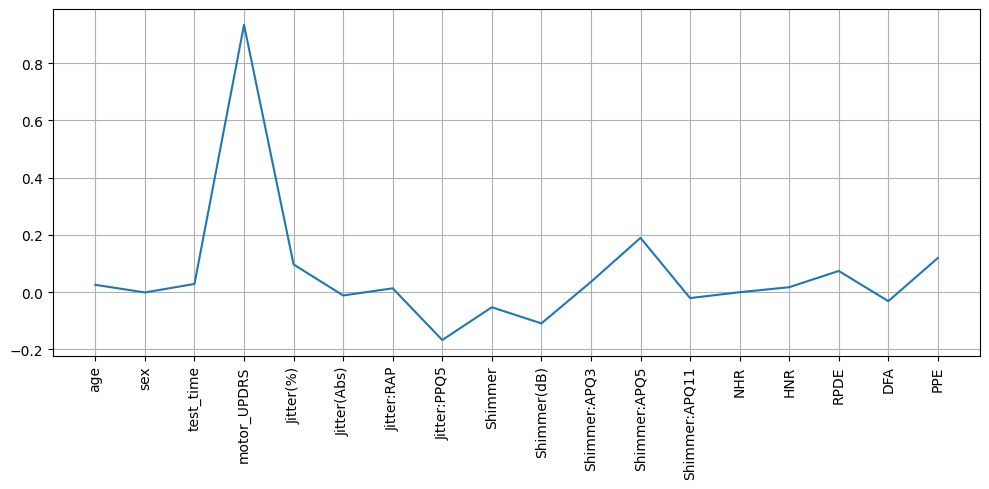

In [ ]:
regressors = list(X_train_norm.columns)
Nf = len(w_hat)
nn = np.arange(Nf)

plt.figure(figsize=(10, 5)) # plot the estimated weights of the regressors - features versus the regressors
plt.plot(nn, w_hat)
plt.xticks(nn, regressors, rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

<!-- The steepest descent algorithm
1 Start from an initial random guess x0, set i = 0
2 Evaluate the gradient and the Hessian matrix at point xi, rf(xi) and
H(xi)
3 Find the new point as
xi+1 = xi 􀀀 krf(xi)k2
rf(xi)TH(xi)rf(xi)rf(xi)
4 set i := i + 1, go back to step 2, unless a stopping condition is met -->

In [ ]:
#trying to find overfitting on the training data # how? - by comparing the predicted values with the actual values in train and test data
y_hat_test_norm = X_test_norm@w_hat
y_hat_train_norm = X_train_norm_np@w_hat

#Normalizing the data back to original scale
# the normalization is undone by multiplying by the standard deviation and adding the mean, doctors can understand the values and units
y_hat_test = y_hat_test_norm*std_y + mean_y
y_test = y_test_norm*std_y + mean_y

y_hat_train = y_hat_train_norm*std_y + mean_y
y_train = y_train_norm*std_y + mean_y


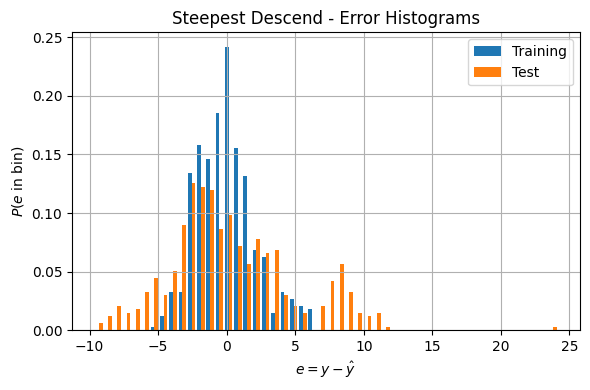

In [ ]:
# Calculate errors for training and test sets (residuals) to check for overfitting # residuals are the difference between the actual and predicted values
err_train = (y_train - y_hat_train)  # Training errors
err_test = (y_test - y_hat_test)  # Test errors
errors = [err_train, err_test]   # Combine errors for plotting

# Plot histogram of errors
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=50, density=True, histtype='bar', label=['Training', 'Test'])
plt.xlabel(r'$e = y - \hat{y}$')  # Error on x-axis
plt.ylabel(r'$P(e \text{ in bin})$')  # Probability density on y-axis
plt.legend()
plt.grid()
plt.title('Steepest Descend - Error Histograms')
plt.tight_layout()

# Save and display the figure
# plt.savefig('./LLS-hist.png')
plt.show()

# Clearly no Gaussian PDF, so the model is not perfect
# not much overfitting

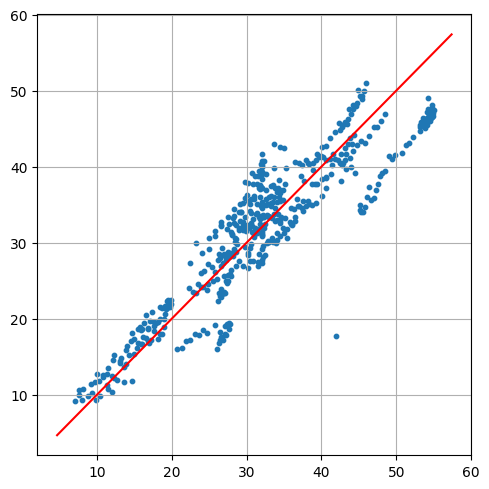

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_hat_test, s=10)  # Set point size with 's'
plt.plot([plt.axis()[0], plt.axis()[1]], [plt.axis()[0], plt.axis()[1]], 'r') # Diagonal line for reference - y=x
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# train set error
err_train_min = err_train.min()
err_train_max = err_train.max()
err_train_mu = err_train.mean()
err_train_sig = err_train.std()
err_train_MSE = np.mean(err_train**2)
R2_train = 1-err_train_MSE/(np.var(y_train))
corr_train = np.mean((y_train-y_train.mean())*(y_hat_train-y_hat_train.mean()))/(y_train.std()*y_hat_train.std())

# test set errors
err_test_min = err_test.min()
err_test_max = err_test.max()
err_test_mu = err_test.mean()
err_test_sig = err_test.std()
err_test_MSE = np.mean(err_test**2)
R2_test = 1-err_test_MSE/(np.var(y_test)) # R2 is the coefficient of determination - how well the model explains the variance in the data - 1 is perfect - formula is 1 - (MSE of model/MSE of mean model)
corr_test = np.mean((y_test-y_test.mean())*(y_hat_test-y_hat_test.mean()))/(y_test.std()*y_hat_test.std()) # correlation coefficient - how well the model fits the data - 1 is perfect - formula is the covariance of the actual and predicted values divided by the product of the standard deviations of the actual and predicted values

In [137]:
rows = ['Train', 'Test']
cols = ['min', 'max', 'mean', 'std', 'MSE', 'R2', 'CorrCoeff']
train_errors = [err_train_min, err_train_max, err_train_mu, err_train_sig, err_train_MSE, R2_train, corr_train]
test_errors = [err_test_min, err_test_max, err_test_mu, err_test_sig, err_test_MSE, R2_test, corr_test]

result = pd.DataFrame([train_errors, test_errors], index=rows, columns=cols)
result

,min,max,mean,std,MSE,R2,CorrCoeff
Train,-5.230536,6.555953,2.296704e-16,2.14909,4.609255,0.950072,0.973732
Test,-9.664703,24.149699,3.083451e-01,4.52999,20.574429,0.827413,0.908224


# Complete

Converged in 1116 iterations.


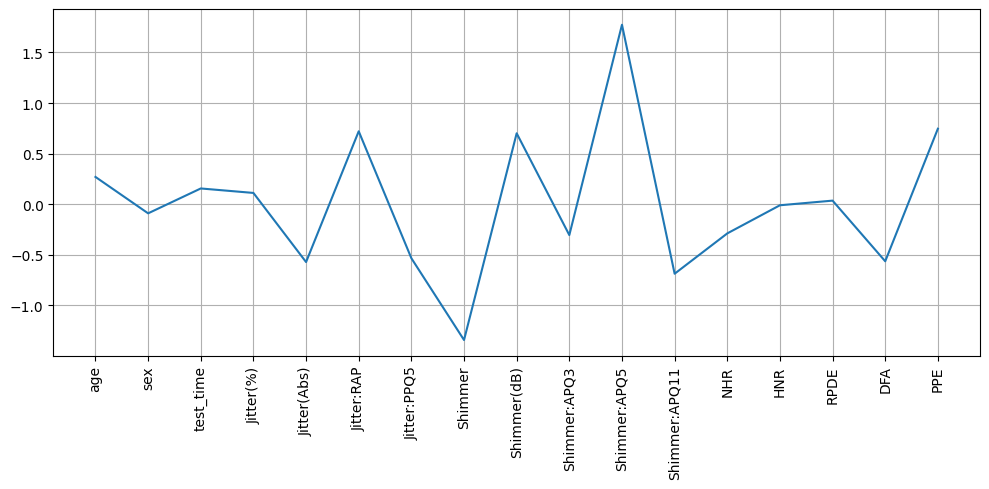

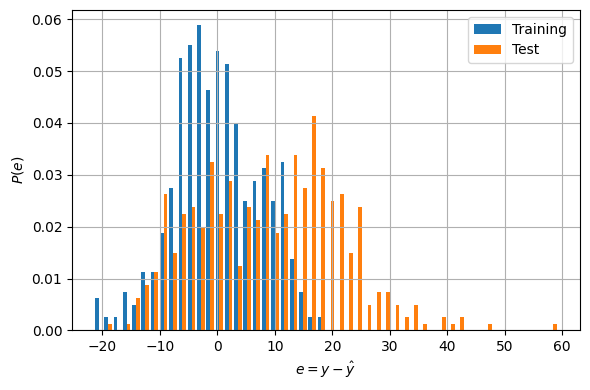

/var/folders/r5/tmz4tmxn6s5f_cnt2d3y0pv00000gn/T/ipykernel_28563/908003858.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")  # Add legend


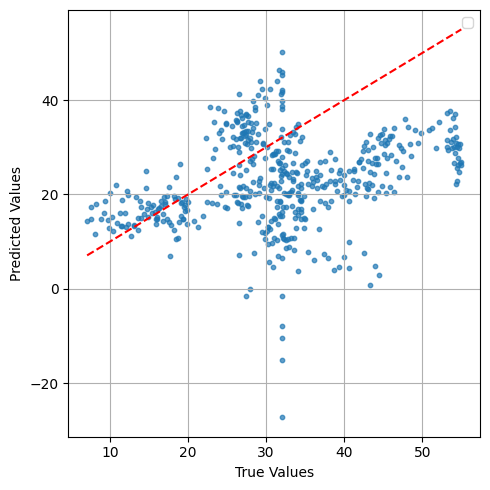

             min        max          mean        std         MSE        R2  \
Train -21.440538  17.673844 -1.722528e-15   7.472280   55.722166  0.396412   
Test  -18.234566  59.241475  8.927143e+00  12.389783  232.890492 -0.953583   

       CorrCoeff  
Train   0.629133  
Test    0.275203  


In [ ]:
# Toggle for including or excluding 'Motor UPDRS' <-------------------
include_motor_UPDRS = False  # Set to True to include 'Motor UPDRS', False to exclude it

# Data preprocessing
N_train = int(Np * 0.5)
N_test = Np - N_train

X_train = Xshuff[:N_train]
X_train_mean = X_train.mean()
X_train_std = X_train.std()

mean_y = X_train_mean['total_UPDRS']
std_y = X_train_std['total_UPDRS']

Xshuff_norm = (Xshuff - X_train_mean) / X_train_std  # Normalize data
yshuff_norm = Xshuff_norm['total_UPDRS']  # Target variable (Regressand)
Xshuff_norm = Xshuff_norm.drop(['total_UPDRS', 'subject#'], axis=1)  # Drop target and 'subject#'

# Drop specific features
Xshuff_norm = Xshuff_norm.drop(['Jitter:DDP', 'Shimmer:DDA'], axis=1)

# Conditionally drop 'Motor UPDRS'
if not include_motor_UPDRS:
    Xshuff_norm = Xshuff_norm.drop(['motor_UPDRS'], axis=1)

# Train-test split
X_train_norm = Xshuff_norm[:N_train]
X_test_norm = Xshuff_norm[N_train:]
y_train_norm = yshuff_norm[:N_train]
y_test_norm = yshuff_norm[N_train:]

# Define and run steepest descent
def steepest_descent(X, y, max_iter=2000, epsilon=1e-3):
    N, M = X.shape
    w = np.zeros((M, 1))  # Initialize weights
    for i in range(max_iter):
        y_pred = X @ w  # Predicted values
        error = y - y_pred  # Residuals
        grad = -2 * X.T @ error  # Gradient
        H = 2 * X.T @ X  # Hessian
        step_size = (grad.T @ grad) / (grad.T @ H @ grad)  # Step size
        w_new = w - step_size * grad # Update weights with step size that is optimal
        if np.linalg.norm(w_new - w) < epsilon:  # Check convergence
            print(f"Converged in {i+1} iterations.")
            break
        w = w_new
    else:
        print("Reached maximum iterations without convergence.")
    return w

# Convert to NumPy arrays
X_train_norm_np = np.array(X_train_norm)
y_train_norm_np = np.array(y_train_norm).reshape(-1, 1)

# Run steepest descent
w_hat = steepest_descent(X_train_norm_np, y_train_norm_np)

# Plot weights
regressors = list(X_train_norm.columns)
w_hat = w_hat.ravel()  # Convert to 1D
plt.figure(figsize=(10, 5))
plt.plot(range(len(w_hat)), w_hat)
plt.xticks(range(len(w_hat)), regressors, rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

# Predictions and de-normalization
y_hat_test_norm = X_test_norm @ w_hat
y_hat_train_norm = X_train_norm_np @ w_hat

y_hat_test = y_hat_test_norm * std_y + mean_y
y_test = y_test_norm * std_y + mean_y
y_hat_train = y_hat_train_norm * std_y + mean_y
y_train = y_train_norm * std_y + mean_y

# Error calculations
err_train = y_train - y_hat_train
err_test = y_test - y_hat_test

# Plot error histograms
plt.figure(figsize=(6, 4))
plt.hist([err_train, err_test], bins=50, density=True, histtype='bar', label=['Training', 'Test'])
plt.xlabel(r'$e = y - \hat{y}$')
plt.ylabel(r'$P(e)$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Scatter plot of predictions vs. true values
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_hat_test, s=10, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend(loc="best")  # Add legend
plt.grid()
plt.tight_layout()
plt.show()

# Calculate metrics
train_errors = {
    "min": err_train.min(),
    "max": err_train.max(),
    "mean": err_train.mean(),
    "std": err_train.std(),
    "MSE": np.mean(err_train**2),
    "R2": 1 - np.mean(err_train**2) / np.var(y_train),
    "CorrCoeff": np.mean((y_train-y_train.mean())*(y_hat_train-y_hat_train.mean()))/(y_train.std()*y_hat_train.std())
}

test_errors = {
    "min": err_test.min(),
    "max": err_test.max(),
    "mean": err_test.mean(),
    "std": err_test.std(),
    "MSE": np.mean(err_test**2),
    "R2": 1 - np.mean(err_test**2) / np.var(y_test),
    "CorrCoeff": np.mean((y_test-y_test.mean())*(y_hat_test-y_hat_test.mean()))/(y_test.std()*y_hat_test.std())
}

# Display results
result = pd.DataFrame([train_errors, test_errors], index=["Train", "Test"])
print(result)


### With Motor_UPDRS
            min        max          mean      std        MSE        R2  \
Train -5.230536   6.555953  2.296704e-16  2.14909   4.609255  0.950072   
Test  -9.664703  24.149699  3.083451e-01  4.52999  20.574429  0.827413   

       CorrCoeff  
Train   0.974717  
Test    0.910062  

### Without Motor_UPDRS
             min        max          mean        std         MSE        R2  \
Train -21.440538  17.673844 -1.722528e-15   7.472280   55.722166  0.396412   
Test  -18.234566  59.241475  8.927143e+00  12.389783  232.890492 -0.953583   

       CorrCoeff  
Train    0.62977  
Test     0.27576 